Customer Segmentation Analysis Part 1
Q. What is Customer Segmentation and why is it important from a marketing perspective?

Customer segmentation is the process by which you divide your customers into segments up based on common characteristics – such as demographics, area or behaviors, so you can market to those customers more effectively. It is important from marketing perspective because by segmenting customer it will be easier to market accordingly and get results of your marketing campaign.

In [1]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
data.shape

(541909, 8)

In [6]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
Wet pallet-thrown away                   1
 TOADSTOOL BEDSIDE LIGHT                 1
came coded as 20713                      1
samples/damages                          1
dotcom sold sets                         1
Name: Description, Length: 4223, dtype: int64

Data Preprocessing
Remove Null Values
Remove Duplicate Values

In [7]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [8]:
data.shape

(406829, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [12]:
filtered_data.shape

(4380, 2)

In [13]:
filtered_data

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


In [14]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


Data Insights : Can we look at Top 10 country customer data

In [15]:
# Check the country wise distribution
data.Country.value_counts()[:10]

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: Country, dtype: int64

In [16]:
filtered_data_top10 = filtered_data.Country.value_counts()[:10]
filtered_data_top10

United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

Text(0, 0.5, 'Count')

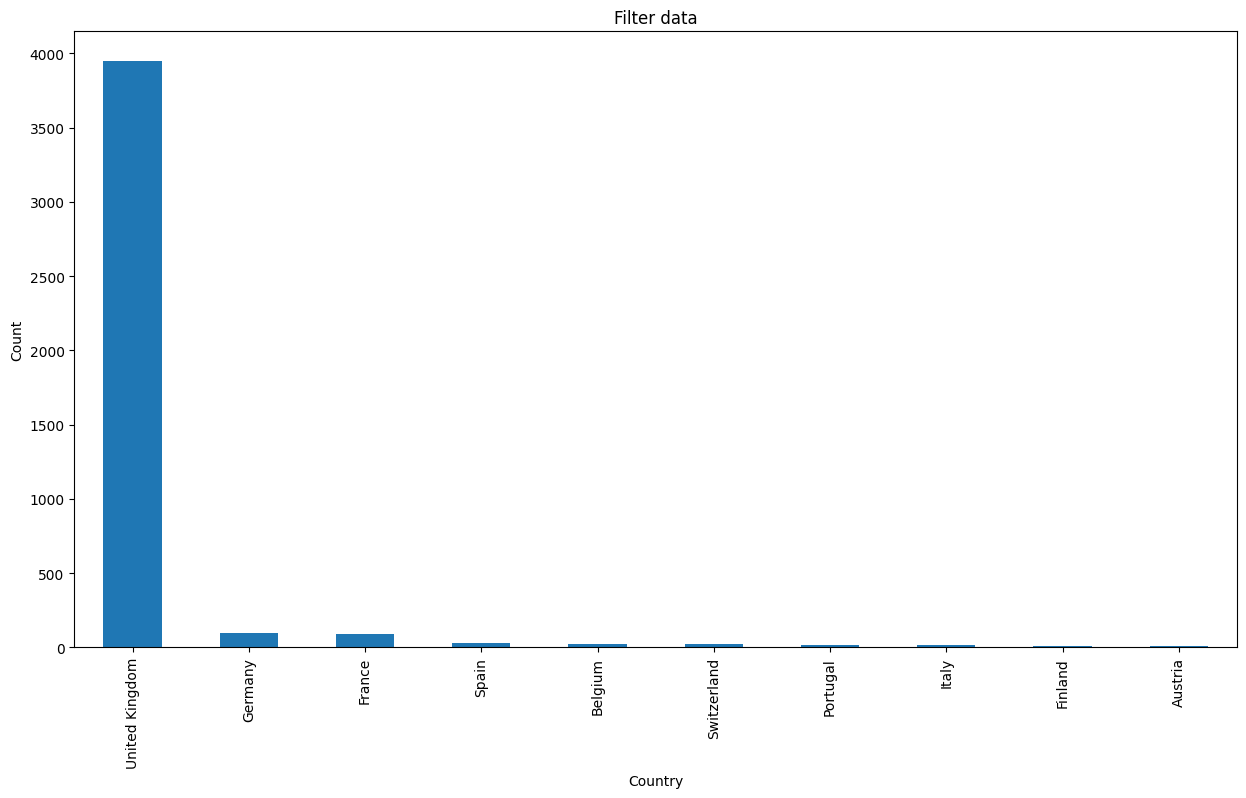

In [17]:
 #Plot the data (Make a bar chart)
filtered_data_top10.plot(kind="bar",figsize=(15, 8))
plt.title("Filter data")
plt.xlabel("Country")
plt.ylabel("Count")

Q. What do you observe?

We observe that majority of customer (~95%-99%) are from the United kingdom. so working on UK data can give most of the answers also

In [18]:
uk_data=data[data.Country=='United Kingdom']

In [19]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000



Q. What do you observe? Which column needs special attention?

Quantity values having negative is a cause of concern - So we need to give special attention to quantity column cause the value of quantity cannot be in negatives. either these are wrong entries or some error in the system , so these need to be filtered for working and getting the right values

In [20]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [21]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [22]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [23]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [24]:
# Calculate Total Price (Quantity) * Unit Price
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

Time frame of data

In [25]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


Q. Comment on the above results.

We have data for 1 year which is starting date of our data is 1 Dec 2010 and the last date is 9 Dec 2011.(Nearly 1 year and 9 days)

Perform RFM Analysis
For Recency, Calculate the number of days between present date and date of last purchase for each customer.
For Frequency, Calculate the number of orders for each customer.
For Monetary, Calculate sum of purchase price for each customer

In [26]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [27]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [28]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [29]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

 Q. Comment on the above results

We can find top five customer based on Invoice No from our dataset - meand finding the customer who orders most items on one invoice. By going through the dataset we saw that Customer ID, Invoice Number, Invoice Date and Country remained the same while the Stock Code, Description, Quantity changed for every observation. And this is quite logical because generally invoices contains more than one items.

In [30]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [31]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [32]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [33]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [34]:
rfm['recency'] = rfm['recency'].astype(int)

In [35]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [36]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


Q. What is wrong with this table think ??

The order of the rfm columns is wrong - Monetary should be Sum of Price, Frequency should be count of invoice and Recency is the number of days difference between today and max(invoice date)  

In [37]:
# Change the column names
rfm.columns=['recency','frequency','monetary']

Create Visuals
Histogram for Recency Data
Histogram for Frequency Data
Histogram for Monetary Data

array([[<AxesSubplot: title={'center': 'recency'}>]], dtype=object)

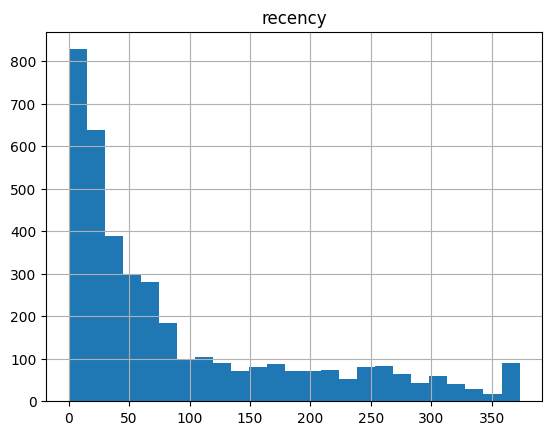

In [38]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency', bins=25)

Q. What does this above chart tell ?

This histogram tells that most of the customers turned back to the store between 0 and 50-60 days (2 months time period), very few customers (~100) visit the store after 70 days till 1 year. there are some anomalies/outliers who turned back after an year (350 days) but those can be ignored   

array([[<AxesSubplot: title={'center': 'frequency'}>]], dtype=object)

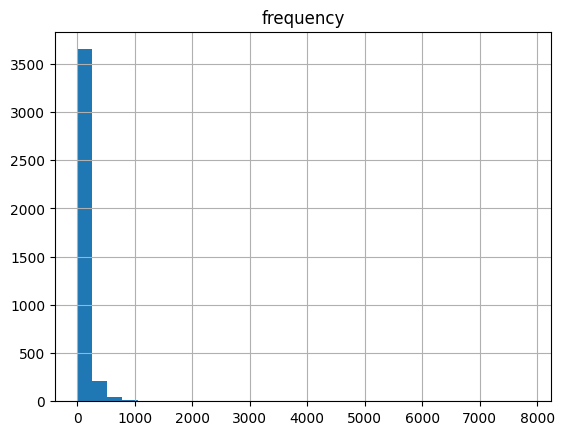

In [39]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency', bins=30)

Q. What does this above chart tell ?

The above chart indicates that the frequency at which the customer visits the store. We can see that number of customer who have visited store 50 times is very high that is around 2500.

array([[<AxesSubplot: title={'center': 'monetary'}>]], dtype=object)

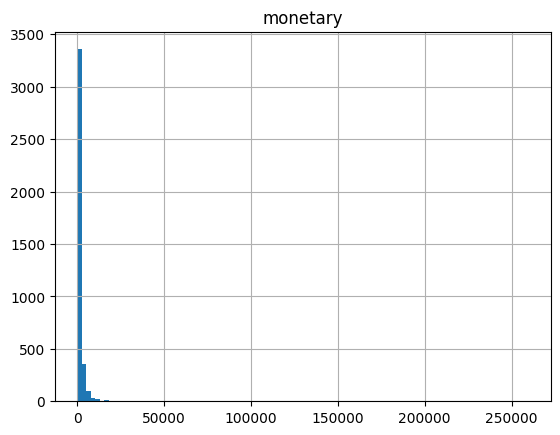

In [40]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=100)

In [41]:
rfm.sort_values(by=['monetary'], inplace=True)

rfm = rfm[rfm.monetary <10000]

rfm.tail(100)

,recency,frequency,monetary
CustomerID,,,
14049.0,16,488,5681
14110.0,3,156,5683
13468.0,1,302,5704
16553.0,163,84,5719
13178.0,26,265,5725
...,...,...,...
14733.0,16,202,9585
13458.0,7,382,9646
15078.0,7,440,9743


Histogram for Monetary Data (UK)

array([[<AxesSubplot: title={'center': 'monetary'}>]], dtype=object)

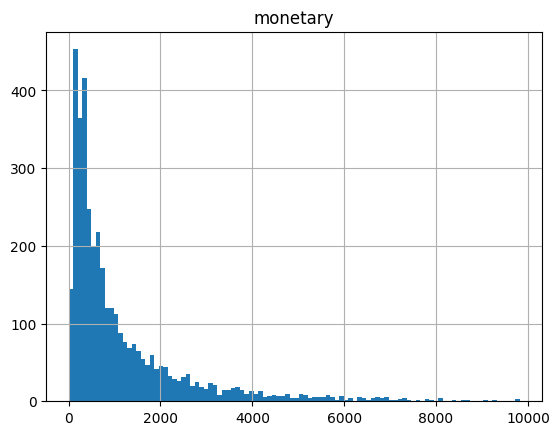

In [42]:
rfm.hist(column='monetary', bins=100)

Q. What does this above chart tell ?

From the above graph, around 500 people are spending less money which are around the 500 or 1000$ whereas on the other side there are very few people are spending money beyond the 2000$.  There is outlier after 8000$.

In [43]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

Calculate the RFM Score

In [44]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 15.0, 0.4: 33.0, 0.6: 72.0, 0.8: 182.0},
 'frequency': {0.2: 13.0, 0.4: 28.0, 0.6: 55.0, 0.8: 115.0},
 'monetary': {0.2: 236.0, 0.4: 450.0, 0.6: 854.0, 0.8: 1822.0}}

In [45]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [46]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

/tmp/ipykernel_1991/3071033863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
/tmp/ipykernel_1991/3071033863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
/tmp/ipykernel_1991/3071033863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [47]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

/tmp/ipykernel_1991/1662531255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)


,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
13256.0,14,1,0,5,1,1,511
16738.0,297,1,3,1,1,1,111
16454.0,44,2,6,3,1,1,311
14792.0,63,2,6,3,1,1,311
17956.0,249,1,12,1,1,1,111


In [48]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

/tmp/ipykernel_1991/1017118094.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
/tmp/ipykernel_1991/1017118094.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)


,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,14,1,0,5,1,1,511,new customers
16738.0,297,1,3,1,1,1,111,at risk
16454.0,44,2,6,3,1,1,311,needs attention
14792.0,63,2,6,3,1,1,311,needs attention
17956.0,249,1,12,1,1,1,111,at risk


In [49]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose          77
new customers       147
needs attention     477
loyal customers     695
champions           989
at risk            1451
Name: Segment, dtype: int64

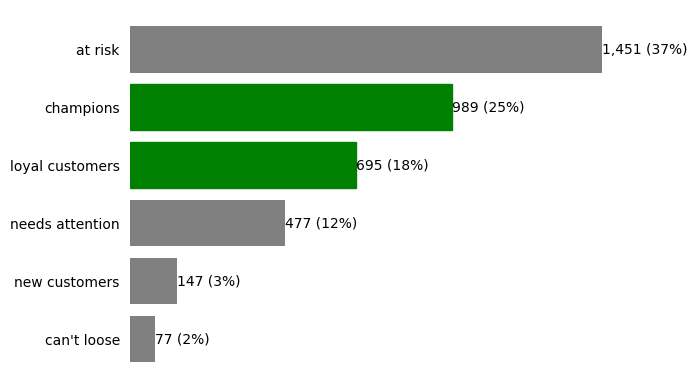

In [50]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Q. Comment on the above chart

    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'

Customers who visited the store long back (recency 1-2) and also visited the store from low to medium times(1-4 on frequency) are someone who are at "Risk" of going away - these might come back if contacted back with offers and some deals, so that interest can be triggered back in them 

Category "can't lose" are someone who visited the store long back but whenever they were active they had the top frequency (means too many visits to the store). these customers were very good and loyal at one point and thus if again contacted back can turn into frequent customers

"Need attention" - this category is right in the middle - they visited the store some time back and they were not that frequent also to the store - so extra attention is needed for these customers so that they can be turned into either higher frequency or higher recency group. these are most easy to turn customers and thus can be just one or two changes away from getting into higher categories

"Loyal Customers"  - the kind of customers every store wants - pretty high on recency and high on frequency, means they visited recently and always tend to visit many time (have more invoices)

"New Customer": They are the kind of customer who have visited the store recently for the first time. We should target these customer by deals and try to make them as our regular customer.

"Champion Customers": Customers who visited the store regularly with recency score of 4-5 and the customer who visited the store more frequently with the frequency rank as 2-5 . These customers are considered to be champions customers who are majorly contributing towards the store overall revenue because of visiting store frequently. 

In the graph Store has most of the customers at "Risk" of losing out so they need to be looked at - these are customers if given right deals can turn back before moving away. second and third count categories are of champion and loyal customers which means the store has maximum customers (~1700), around 45% of total customers. these customers runs most of the business of the store and tend to come back regularly to store. last three categories are small in numbers but are important specially "new customers" - although small but if given proper focus can turn into champions or Loyals   

Q. Who are the best customers?

Champion are considered to be the best customers for any business. They are the type of customer one which every business desires to have because they are always high on recency and frequency  and they often provide high monetary value which means more business and eventually more profit.

In [51]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,5,5,5,555,champions
13199.0,3,119,9817,5,5,5,555,champions
15078.0,7,440,9743,5,5,5,555,champions
13458.0,7,382,9646,5,5,5,555,champions
16523.0,1,290,9418,5,5,5,555,champions


Q. Which customers are likely to churn?

Customer those who are at risk which in our case are 1451(i.e 37%) are most likely to churn. they haven't come to the store in a long time (reasons can be many) but they were moderate visitors when they were active. 

In [52]:
#Customers who's recency value is low
rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13093.0,275,159,7832,1,5,5,155,can't loose
17850.0,372,297,5391,1,5,5,155,can't loose
15032.0,256,52,4959,1,3,5,135,at risk
15808.0,306,208,3734,1,5,5,155,can't loose
17230.0,264,69,3638,1,4,5,145,at risk


Q. Which customers we are going to loose?

Customer those who are at risk and can't loose are the type of customer we are going to loose in future. Because the recency score is 1 which means that they have visited the store long time back no matter what the frequency score means.

In [53]:
rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
14237.0,373,9,161,1,1,1,111,at risk
17643.0,373,8,101,1,1,1,111,at risk
15350.0,373,5,115,1,1,1,111,at risk
13747.0,373,1,79,1,1,1,111,at risk
15070.0,372,1,106,1,1,1,111,at risk


Q. Who are the loyal customers?

Loyal customer are considered to be the loyal customers for any business. They are the type of customer who are shopping from the store for the longest time. They are high on recency and frequency means they visited recently and always tend to visit many time (have more invoices) 

In [54]:
#Customers with high frequency value
rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,5,5,5,555,champions
13199.0,3,119,9817,5,5,5,555,champions
15078.0,7,440,9743,5,5,5,555,champions
13458.0,7,382,9646,5,5,5,555,champions
14733.0,16,202,9585,4,5,5,455,loyal customers


Calculate RFM scores using 4 quartiles and answer all the questions again
Make sure you give proper names to the segments. Please create 4 segments based on R and F scores instead of 6

In [55]:
# Create the customer segments based on your knowledge. 
# Create 4 segments based on R and F scores

segments1 = {
    '[1-2][1-5]': 'red',
    '[1-5][1-3]': 'amber',
    '[3-4][1-5]': 'yellow',
    '[4-5][4-5]': 'green',
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments1, regex=True)
rfm.head()

/tmp/ipykernel_1991/1621897150.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
/tmp/ipykernel_1991/1621897150.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['Segment'].replace(segments1, regex=True)


,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,14,1,0,5,1,1,511,amber
16738.0,297,1,3,1,1,1,111,red
16454.0,44,2,6,3,1,1,311,amber
14792.0,63,2,6,3,1,1,311,amber
17956.0,249,1,12,1,1,1,111,red


In [56]:
#count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts






green      548
yellow     695
amber     1065
red       1528
Name: Segment, dtype: int64

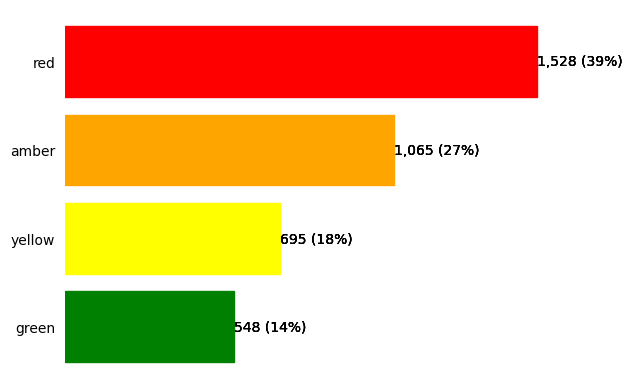

In [57]:
# Distribution of Segments
fig, ax = plt.subplots()
bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['green']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['yellow']:
            bar.set_color('yellow')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['amber']:
            bar.set_color('orange')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['red']:
            bar.set_color('red')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
plt.show()

    '[1-2][1-5]': 'red',
    '[1-5][1-3]': 'amber',
    '[3-4][1-5]': 'yellow',
    '[4-5][4-5]': 'green',

Customers who visited the store long back (recency 1-2) but were  visiting the store from are marked  "RED" as store thinks that they might not come as they might have moved to other stores or location. 

Amber category are the customers whose frequency is pretty low - so if we focus on this group there is a possibility that they can visit store regularly.

Yellow group are the people who visited the store very recently (3-4) but frequency is high to low. again if given right focus the store can turn them into green category.

"Green Category": Customers who visited the store regularly with recency score of 4-5 and the customer who visited the store more frequently with the frequency rank as 4-5  are shown in "Green" color. These customers are considered to be champions customers who are majorly contributing towards the store overall revenue because of visiting store frequently. 

Summary: We need to focus on the customers in Yellow and Red Category that is about 45% of total customer and there is nothing to worry about the customers in green category they are considered as most loyal customers. And leave the Red category out of picture because they have not visited store recently and the frequency when they were visiting is also quite low so we don't need to focus on this category.


Can you create segments based on F and M scores. This is an extra exercise for groups who want to try more. It is not mandatory.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf774db2-d69d-4c68-9d3d-54c7625b552d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>